In [21]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df['diagnosis'] = df['target'].map({0: 'maligno', 1: 'benigno'})

df[['target', 'diagnosis']].head()

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,maligno


Acertividade com K=10: 0.98


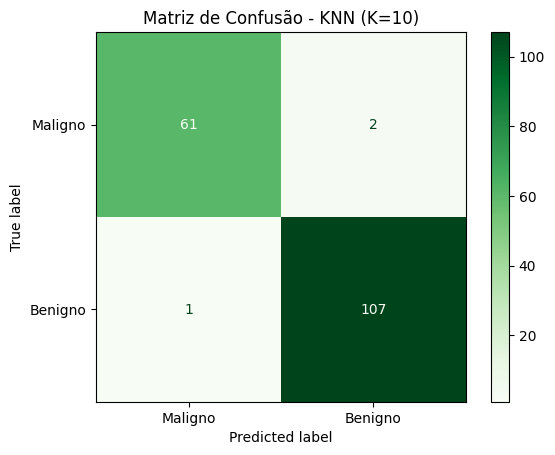

In [ ]:
X = df.drop(columns=['target', 'diagnosis'])  # Remova as colunas não numéricas
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Acertividade com K=10: {acc:.2f}")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Maligno', 'Benigno'])
disp.plot(cmap='Greens')
plt.title("Matriz de Confusão - KNN (K=10)")
plt.show()

In [23]:
X_noise = X + np.random.normal(0, 0.1, size=X.shape)
y_noise = y

X_full = pd.concat([pd.DataFrame(X), pd.DataFrame(X_noise)], axis=0)
y_full = pd.concat([y, y_noise], axis=0)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=42)
knn.fit(X_train_full, y_train_full)
y_pred_full = knn.predict(X_test_full)

acc_full = accuracy_score(y_test_full, y_pred_full)
print(f"Acertividade com dados aumentados: {acc_full:.2f}")

Acertividade com dados aumentados: 0.93


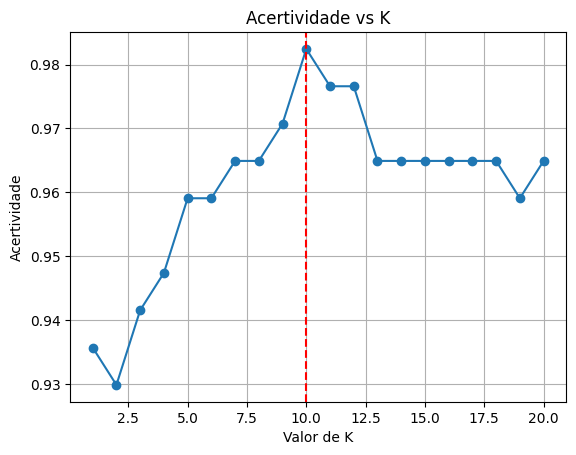

In [24]:
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Acertividade')
plt.title('Acertividade vs K')
best_k = k_values[np.argmax(accuracies)]
plt.axvline(x=best_k, color='r', linestyle='--', label=f'K ótimo: {best_k}')
plt.grid(True)
plt.show()

In [25]:
X_reg = df.select_dtypes(include=[np.number]).drop(columns=['mean area'])
y_reg = df['mean area']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)

r2 = r2_score(y_test_r, y_pred_r)
print(f"R²: {r2:.2f}")

R²: 1.00


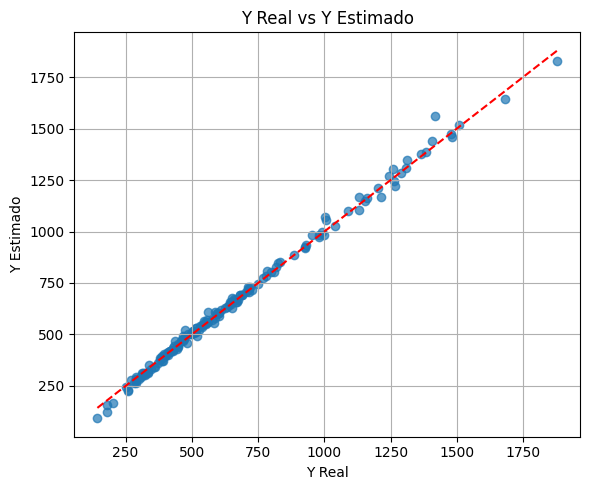

In [26]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test_r, y_pred_r, alpha=0.7)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.title("Y Real vs Y Estimado")
plt.xlabel("Y Real")
plt.ylabel("Y Estimado")
plt.grid(True)
plt.tight_layout()
plt.show()

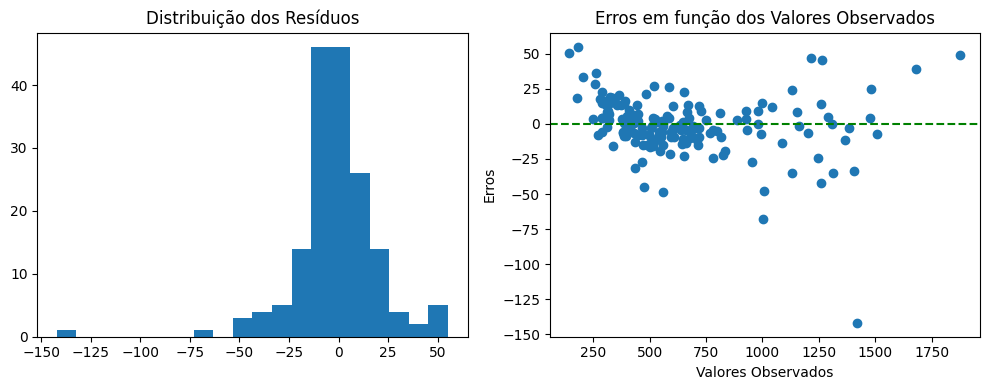

In [27]:
residuos = y_test_r - y_pred_r

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title("Distribuição dos Resíduos")
plt.hist(residuos, bins=20)

plt.subplot(1, 2, 2)
plt.scatter(y_test_r, residuos)
plt.axhline(0, color='g', linestyle='--')
plt.xlabel("Valores Observados")
plt.ylabel("Erros")
plt.title("Erros em função dos Valores Observados")

plt.tight_layout()
plt.show()

In [28]:
from scipy.stats import skew, kurtosis

media = np.mean(residuos)
variancia = np.var(residuos)
assimetria = skew(residuos)
curtose = kurtosis(residuos)

print(f"Média dos resíduos: {media:.4f}")
print(f"Variância dos resíduos: {variancia:.4f}")
print(f"Assimetria dos resíduos: {assimetria:.4f}")
print(f"Curtose dos resíduos: {curtose:.4f}")

Média dos resíduos: -1.1088
Variância dos resíduos: 443.6929
Assimetria dos resíduos: -1.6621
Curtose dos resíduos: 11.3948
